In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from mgc.sims import *

In [10]:
import seaborn as sns
sns.color_palette('Set1')
sns.set(color_codes=True, style='white', context='talk', font_scale=2)

In [11]:
NOISY = 100
NO_NOISE = 1000

In [12]:
simulations = [
    (linear, "Linear"),
    (exponential, "Exponential"),
    (cubic, "Cubic"),
    (joint_normal, "Joint Normal"),
    (step, "Step"),
    (quadratic, "Quadratic"),
    (w_shaped, "W-Shaped"),
    (spiral, "Spiral"),
    (uncorrelated_bernoulli, "Uncorrelated Bernoulli"),
    (logarithmic, "Logarithmic"),
    (fourth_root, "Fourth Root"),
    (sin_four_pi, "Sine 4\u03C0"),
    (sin_sixteen_pi, "Sine 16\u03C0"),
    (square, "Square"),
    (two_parabolas, "Two Parabolas"),
    (circle, "Circle"),
    (ellipse, "Ellipse"),
    (diamond, "Diamond"),
    (multiplicative_noise, "Multiplicative"),
    (multimodal_independence, "Independence")
]

In [27]:
def plot_sims():
    fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(28,24))
    count = 0
    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            count = 5*i + j
            sim, sim_title = simulations[count]
            if sim_title == "Multiplicative" or sim_title == "Independence":
                x, y = sim(NO_NOISE, 1)
                x_no_noise, y_no_noise = x, y
            else:
                x, y = sim(NOISY, 1)
                x_no_noise, y_no_noise = sim(NO_NOISE, 1, noise=0)

            col.scatter(x, y, c='b', label="noise", alpha=0.5)
            col.scatter(x_no_noise, y_no_noise, c='r', label="no noise")
            col.set_title('{}. {}'.format(count+1, sim_title), fontsize=35)
            col.set_xticks([])
            col.set_yticks([])
            if count == 16:
                col.set_ylim([-1, 1])
            sns.despine(left=True, bottom=True, right=True)
                
    leg = plt.legend(bbox_to_anchor=(0.5, 0.1), bbox_transform=plt.gcf().transFigure,
                     ncol=5, loc='upper center')
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    plt.subplots_adjust(hspace=.75)

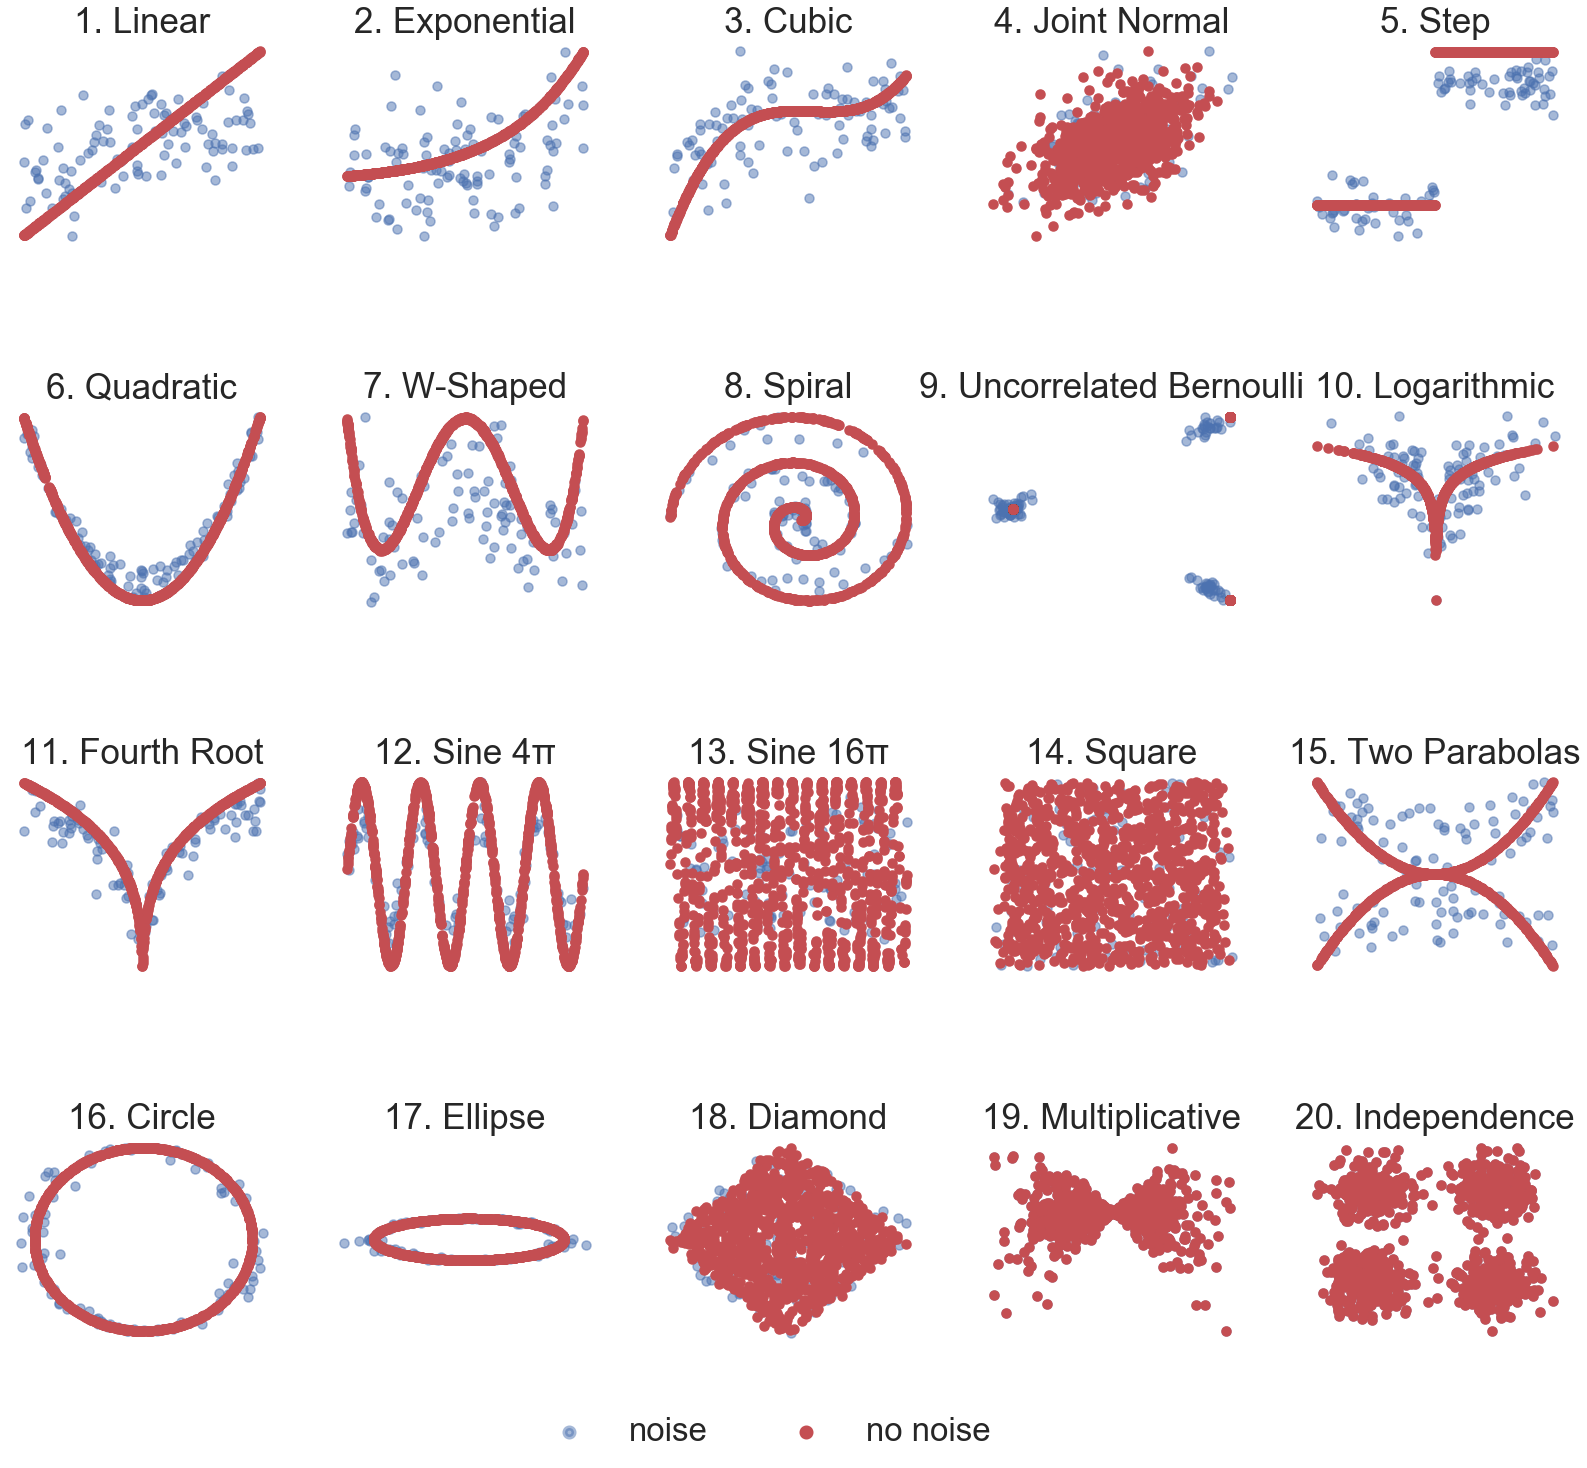

In [28]:
plot_sims()